## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [165]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
warnings.filterwarnings('ignore')               # Turn the warnings off.

#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [111]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [112]:
len(my_docs)

2000

In [113]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

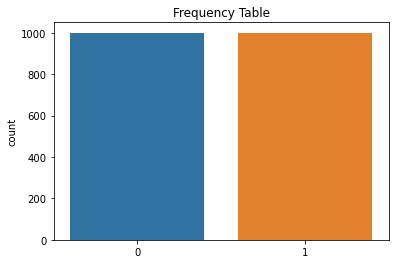

In [114]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

In [115]:
print(my_docs[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \r\nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \r\nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \r\nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \r\nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \r\nparts of this are actually so absurd , that they would fit right in with dogma . \r\nyes , 

1). Carry out the data pre-processing:

#### 1) 1. Tokenization: 

In [116]:
docs=[]
for i in range(len(my_docs)):
    docs.append(my_docs[i].decode("utf-8").lower())

In [117]:
len(docs)

2000

In [118]:
sents=[]
for i in range(len(docs)):
    sents.append(nltk.sent_tokenize(docs[i]))

In [119]:
sents[0][0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse ."

In [120]:
def cleantxt(txt):
    stpw = stopwords.words('english')
    # using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt

for i in range(len(sents)):
    for j in range(len(sents[i])):
        sents[i][j]=cleantxt(sents[i][j])

In [121]:
sents[0][0]

'arnold schwarzenegger icon action enthusiasts since late lately films sloppy liners getting worse'

In [122]:
words=[]
for i in range(len(sents)):
    Words=[]
    for j in range(len(sents[i])):
        Words.append(sents[i][j].split(" "))
    words.append(Words)

In [128]:
print(words[0][0])

['arnold', 'schwarzenegger', 'icon', 'action', 'enthusiasts', 'since', 'late', 'lately', 'films', 'sloppy', 'liners', 'getting', 'worse']


#### 1) 2. Stemming:

In [124]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [135]:
for i in range(len(words)):
    for j in range(len(words[i])):
        for k in range(len(words[i][j])):
            words[i][j] = [stemmer.stem(x) for x in words[i][j]]

In [142]:
words[0][0]

['arnold',
 'schwarzenegg',
 'icon',
 'action',
 'enthusiast',
 'sinc',
 'late',
 'late',
 'film',
 'sloppi',
 'liner',
 'get',
 'wor']

In [144]:
#Join into sentences
Sents=[]
for i in range(len(words)):
    sentences=[]
    for j in range(len(words[i])):
        sentences.append(" ".join(words[i][j]))
    Sents.append(sentences)

In [146]:
Sents[0][0]

'arnold schwarzenegg icon action enthusiast sinc late late film sloppi liner get wor'

In [148]:
#join into paragraphes
Docs=[]
for i in range(len(Sents)):
    par = " ".join(Sents[i])
    Docs.append(par)

In [152]:
Docs[0]

'arnold schwarzenegg icon action enthusiast sinc late late film sloppi liner get wor hard see arnold freez batman robin especi say ton joke million matter arnold sign anoth expen blockbust compar like termin seri true lie even era call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi year basic destroy world appar chosen jericho cane arnold help trusti sidekick kevin pollack stop noth devil take world part actual absurd would right dogma film weak better blockbust right sleepi hollow make world enough look like star film anyway definit seem like arnold movi type film sure gave chuckl well known liner seem confu charact film go understand especi end chang accord sourc asid form still walk much like past film sorri arnold mayb action day speak action film hardli explo fight devil made place explod arnold kick devil butt end chang make spiritu undoubtedli ruin film least hope cool end noth el occur also know film took long cost much realli super aff

### Spliting

In [168]:
X_train, X_test, y_train, y_test = train_test_split(Docs, y, test_size=0.3, random_state=123)

2). Create a TF IDF representation.

In [169]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
train_tfidf = vect.fit_transform(X_train)
val_tfidf   = vect.transform(X_val)
test_tfidf  = vect.transform(X_test)

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [171]:
nb = GaussianNB()
nb.fit(train_tfidf.toarray(), y_train)

GaussianNB()

In [172]:
y_pred_nb = nb.predict(train_tfidf.toarray())
from sklearn import metrics
nbAcc=metrics.accuracy_score(y_train, y_pred_nb)
nbAcc 

0.9985714285714286